In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the dataset from sklearn.dataset library. the library is already imported above.
digits = load_digits()

# Split the data into training and test sets.
#X_train, X_test contains input data and y_train, y_test contains targer labels for training and testing data respectively.
#test_size=0.2 split the train and test data as 80% is training and 20% is test data

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=20)


#normalize function is used to ensure all input images are on same scale.
X_train=tf.keras.utils.normalize(X_train,axis=1)
X_test=tf.keras.utils.normalize(X_test,axis=1)

In [ ]:
# Convert the target labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# Define the model architecture using Keras
# The model has three layers
model = Sequential()
model.add(Dense(128, activation='relu'))        # Dense layer with 128 neurons and using 'relu' activation function
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))      #This is the final output layer with 10 neurons and using 'softmax' activation function

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
accuracy_list = []            #creating accuracy list which will be used to plot a graph
loss_list =[]                 #creating loss list which will be used to plot a graph
epochs=15
for epoch in range(epochs):
# 'fit' method is training model for given input and output data
  model.fit(X_train, y_train,batch_size=32, validation_split=0.2)

# Evaluate the model on the test and train set. Evaluate function computes loss and accuracy for givan input and output data.
  loss, accuracy = model.evaluate(X_test, y_test)                     # accuracy and loss for test data
  loss_train, accuracy_train = model.evaluate(X_train, y_train)       # accuracy and loss for train data
  accuracy_list.append(accuracy_train)
  loss_list.append(loss_train)

print('Test Data loss using Keras:', loss)
print('Accuracy of Test data using Keras:', accuracy)
print('Training Data loss using Keras:', loss_train)
print('Accuracy of Training data using Keras:', accuracy_train)

45/45 [==============================] - 0s 1ms/step - loss: 0.1050 - accuracy: 0.9743
Test Data loss using Keras: 0.12694242596626282
Accuracy of Test data using Keras: 0.9638888835906982
Training Data loss using Keras: 0.10501781105995178
Accuracy of Training data using Keras: 0.974251925945282


In [ ]:
# Store the weights and biases for each layer
weights = []
biases = []
for layer in model.layers:
    w, b = layer.get_weights()        #The get_weights() method is Keras method that returns the current values of the weights and biases for layer.
    weights.append(w)                 #List of weights
    biases.append(b)                  # List of biases

In [ ]:
# Function for forward propagation
def forward_propagation(X, weights, biases):
    A = X
    for i in range(len(weights)):
        Z = np.dot(A, weights[i]) + biases[i]
        if i == len(weights) - 1:
            exp_Z = np.exp(Z)
            A = exp_Z / exp_Z.sum()
        else:
            A = np.maximum(0, Z)
    return A

In [ ]:
# Make predictions on the test set using the forward propagation function
y_pred = forward_propagation(X_test, weights, biases)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

print('Predicted class:', y_pred.shape)
print('True class:', y_test.shape)

Predicted class: (360,)
True class: (360,)


In [ ]:
# calculating accuracy using 'accuracy_score' function

from sklearn.metrics import accuracy_score
print('Accuracy after using Numpy:',accuracy_score(y_test,y_pred))



Accuracy after using Numpy: 0.9638888888888889


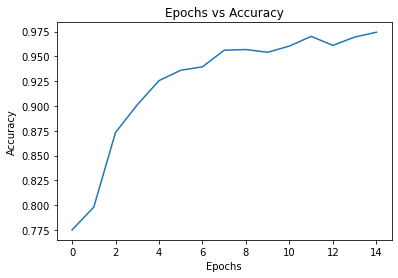

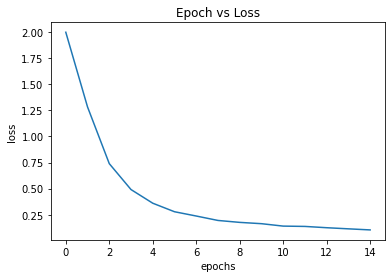

In [ ]:
#Plot a graph Accuracy vs Epochs
x = range(epochs)
y = accuracy_list
plt.plot(x, y)
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Plot a graph Loss vs Epochs
y = loss_list
plt.plot(x, y)
plt.title('Epoch vs Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

1/1 [==============================] - 0s 183ms/step
Predicted Class: 7
True class: 7
Correctly predicted


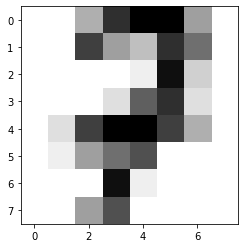

1/1 [==============================] - 0s 16ms/step
Predicted Class: 9
True class: 9
Correctly predicted


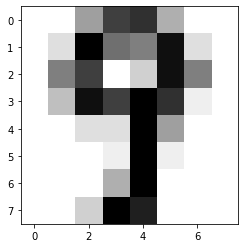

1/1 [==============================] - 0s 21ms/step
Predicted Class: 5
True class: 5
Correctly predicted


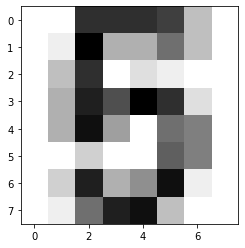

1/1 [==============================] - 0s 15ms/step
Predicted Class: 1
True class: 1
Correctly predicted


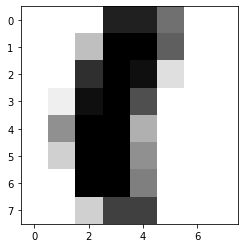

1/1 [==============================] - 0s 16ms/step
Predicted Class: 8
True class: 8
Correctly predicted


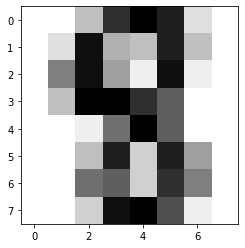

1/1 [==============================] - 0s 19ms/step
Predicted Class: 3
True class: 3
Correctly predicted


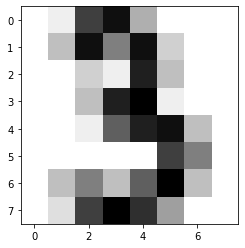

In [ ]:
#Iterate over list of sample classes and predict class label for each class

sample_class = [1,2,3,5,4,6]
for i in sample_class:
  prediction = model.predict(np.array([X_test[i]]))
  predicted_class = np.argmax(prediction)

  # Print the predicted class label
  print("Predicted Class:", predicted_class)
  print("True class:", y_test[i])
  if predicted_class == y_test[i]:
    print("Correctly predicted")

  plt.imshow(X_test[i].reshape(8,8), cmap=plt.cm.gray_r)
  plt.show()